# Ejercicio 2

In [3]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

def map_func(f, ls, *args):
    return list(map(lambda x: f(x, *args), ls))

def plot_acc(f, start, stop, step, name='fn', *args):
    x_vals = np.arange(start, stop, step)
    plt.plot(x_vals, map_func(f, x_vals, *args), label=name)
    plt.grid(linestyle = '--', linewidth = 1)

## Pareto

In [4]:
def pareto(a):
    assert(a > 0)
    return np.power(1 - rnd.random(), 1/a)

pareto(5)

0.9849126850004969

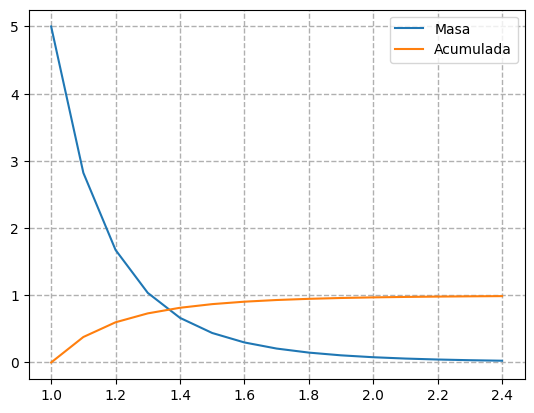

In [9]:
def f_mass(x,a):
    assert(a > 0)
    return a*x**(-a-1)if x >= 1 else 0

def f_acc(x,a):
    assert(a > 0)
    return 1 - 1/np.power(x,a) if x >= 1 else 0

a = 5
start, stop, step = 1, 2.5, 0.1
plot_acc(f_mass, 1, stop, step, 'Masa', a)
plot_acc(f_acc, start, stop, step, 'Acumulada',  a)
plt.legend()
plt.show()

## Erlang

In [ ]:
import random as rnd
import numpy as np

def erlang_sum(n,l):
    ''' Simula erlang con parametros u, l
    '''
    u = 1
    for i in range(n):
        u *= 1 - rnd.random()
    return -np.log(u) * l




In [6]:
def erlang():
    pass

## Weibull

$$
f(x) = {\beta\over\lambda} * \left({x\over\lambda}\right)^{\beta-1} * exp\left( -\left({x\over\lambda}\right)^\beta \right) 
$$
---
$$
F(x) = exp\left(-{x^\beta\over\lambda^\beta}\right) * \left(exp\left({x^\beta\over\lambda^\beta}\right) - 1\right)
$$

$$
F(x) = - exp\left(-{x^\beta\over\lambda^\beta}\right)
$$
---
$$
F(u)^{-1} = \frac{β*exp\left({-{u^β / λ^β}}\right)u^{β-1}}{λ^β}
$$

In [7]:
def weibull():
    pass

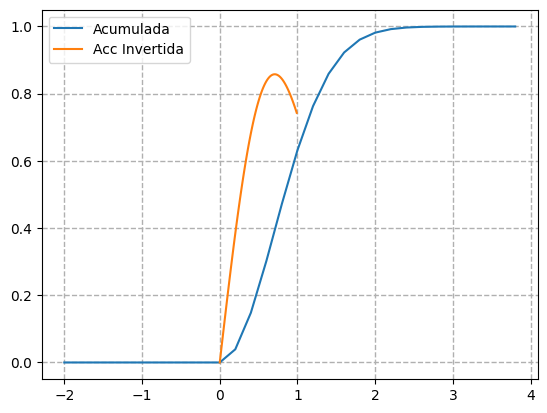

In [17]:
def f_mass(x, b, l):
    assert(x >= 0 and b > 0 and l > 0)
    return b/l * np.power(x/l,b-1) * np.exp(-(x/l)**b)

def f_acc_inv(u,b,l):
    assert( 0 <= u <= 1 and b > 0 and l > 0)
    return (b*np.exp(-u**b / l**b) * u**(b-1)) / l**b

def f_acc(x, b, l):
    assert(b > 0 and l > 0)
    v = x**b / l**b
    return np.exp(-v) * (np.exp(v) - 1) if x >= 0 else 0

B = 2
L = 1
start, stop, step = -2, 4, 0.2
# plot_acc(f_mass, 0, stop, step, 'Masa', B, L)
plot_acc(f_acc, start, stop, step, 'Acumulada', B, L)
plot_acc(f_acc_inv, 0, 1, 0.01, 'Acc Invertida', B, L)
plt.legend()
plt.show()